Using this to import the required libraries

In [32]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns

### Reading the data: Sample example

In [2]:
pwd

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [3]:
import sys

In [4]:
sys.path[0]

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [5]:
sys.path[0]+'/../Datasets/FPA_FOD_20170508.sqlite'

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks/../Datasets/FPA_FOD_20170508.sqlite'

In [6]:
sys.path[0]

'/Volumes/GoogleDrive/My Drive/UCSD Acads/Year 3/Quarter 2/Programming for DS/Project/ECE143_Project/Local Notebooks'

In [7]:
conn = sqlite3.connect('../Datasets/FPA_FOD_20170508.sqlite')

In [8]:
conn

### Dataset description: Important keys

Here are some useful keys needed for extraction from the dataset
- FIRE_YEAR
- DISCOVERY_DATE
- FIRE_SIZE: Area in hectares
- FIRE_SIZE_CLASS: (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)
- LATITUDE
- LONGITUDE
- STATE

In [9]:
data_dates = pd.read_sql_query("SELECT fire_year, discovery_date FROM fires;", conn)

In [10]:
data_size = pd.read_sql_query("SELECT fire_size, fire_size_class FROM fires;", conn)

In [11]:
data_location = pd.read_sql_query("SELECT latitude, longitude, state FROM fires;", conn)

### Checking the data statistics

In [12]:
fire_size_arr = data_size['FIRE_SIZE']

In [13]:
len(fire_size_arr)

1880465

In [14]:
import matplotlib.pyplot as plt

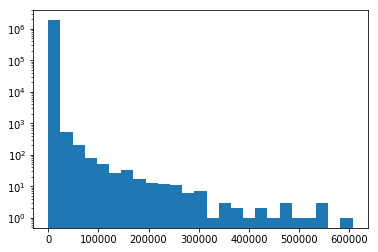

In [30]:
plt.yscale('log')
fire_size_hist = plt.hist(fire_size_arr,25)

In [45]:
fire_size_class_arr = data_size['FIRE_SIZE_CLASS']

In [ ]:
plt.yscale('log')
fire_size_class_hist = plt.hist(fire_size_class_arr,25)

Checking the location statistics

In [16]:
lat_arr = data_location['LATITUDE']

(array([2.31510e+04, 8.63900e+03, 1.86000e+02, 1.03660e+04, 3.18220e+04,
        8.27090e+04, 2.76474e+05, 3.83311e+05, 2.78656e+05, 1.74539e+05,
        1.54833e+05, 1.23231e+05, 1.38547e+05, 1.03015e+05, 7.81430e+04,
        0.00000e+00, 3.00000e+00, 8.30000e+01, 2.62000e+02, 8.55000e+02,
        4.21000e+03, 2.08200e+03, 4.22100e+03, 1.07700e+03, 5.00000e+01]),
 array([17.93972222, 20.03535733, 22.13099244, 24.22662755, 26.32226266,
        28.41789778, 30.51353289, 32.609168  , 34.70480311, 36.80043822,
        38.89607333, 40.99170844, 43.08734355, 45.18297867, 47.27861378,
        49.37424889, 51.469884  , 53.56551911, 55.66115422, 57.75678933,
        59.85242444, 61.94805956, 64.04369467, 66.13932978, 68.23496489,
        70.3306    ]),
 <a list of 25 Patch objects>)

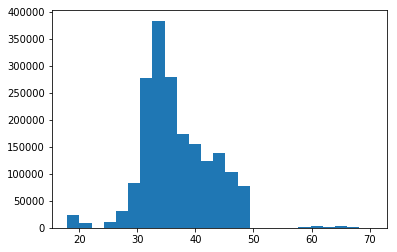

In [17]:
plt.hist(lat_arr,bins = 25)

In [18]:
long_arr = data_location['LONGITUDE']

(array([1.00000e+00, 2.00000e+00, 2.20000e+01, 4.30000e+02, 9.76200e+03,
        2.47100e+03, 6.68600e+03, 2.38500e+03, 3.25000e+02, 4.53000e+02,
        2.01000e+02, 8.17000e+02, 1.85633e+05, 1.35581e+05, 1.14719e+05,
        9.51750e+04, 6.18030e+04, 9.83690e+04, 2.11348e+05, 1.69995e+05,
        2.10022e+05, 3.62101e+05, 1.12286e+05, 6.86730e+04, 3.12050e+04]),
 array([-178.8026    , -174.26077378, -169.71894756, -165.17712133,
        -160.63529511, -156.09346889, -151.55164267, -147.00981644,
        -142.46799022, -137.926164  , -133.38433778, -128.84251155,
        -124.30068533, -119.75885911, -115.21703289, -110.67520666,
        -106.13338044, -101.59155422,  -97.049728  ,  -92.50790177,
         -87.96607555,  -83.42424933,  -78.88242311,  -74.34059688,
         -69.79877066,  -65.25694444]),
 <a list of 25 Patch objects>)

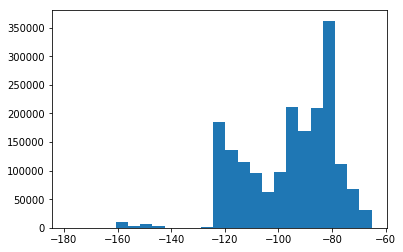

In [31]:
plt.hist(long_arr,bins=25)

### Show data correlations

All data correlations

In [39]:
wildfire_data = pd.read_sql_query("SELECT fire_size, latitude, longitude FROM fires;", conn)

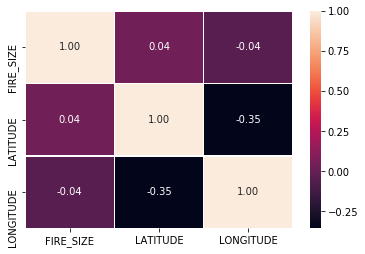

In [40]:
f,ax = plt.subplots()
svm = sns.heatmap(wildfire_data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()
figure = svm.get_figure()

Small fire correlations

In [52]:
fire_size_class_arr[0]

'A'

In [57]:
len(fire_size_class_arr)

1880465

In [58]:
size_key = 'G'

In [59]:
small_size_wildfire_data.update({'FIRE_SIZE':[fire_size_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [60]:
small_size_wildfire_data.update({'LATITUDE':[lat_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [61]:
small_size_wildfire_data.update({'LONGITUDE':[long_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]==size_key]})

In [62]:
small_size_wildfire_data = pd.DataFrame(small_size_wildfire_data)

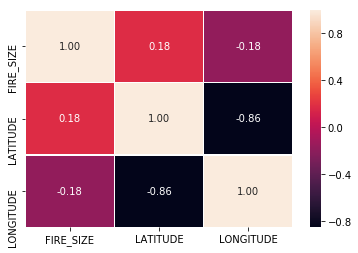

In [63]:
f,ax = plt.subplots()
svm = sns.heatmap(small_size_wildfire_data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()
figure = svm.get_figure()

Large size, with class F and G

In [66]:
small_size_wildfire_data = {}

In [67]:
small_size_wildfire_data.update({'FIRE_SIZE':[fire_size_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]=='F' or fire_size_class_arr[i]=='G']})

In [68]:
small_size_wildfire_data.update({'LATITUDE':[lat_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]=='F' or fire_size_class_arr[i]=='G']})

In [69]:
small_size_wildfire_data.update({'LONGITUDE':[long_arr[i] for i in range(len(fire_size_arr)) \
                                              if fire_size_class_arr[i]=='F' or fire_size_class_arr[i]=='G']})

In [70]:
small_size_wildfire_data = pd.DataFrame(small_size_wildfire_data)

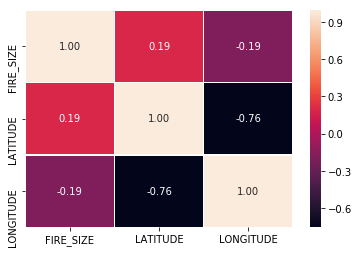

In [71]:
f,ax = plt.subplots()
svm = sns.heatmap(small_size_wildfire_data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()
figure = svm.get_figure()